In [1]:
import numpy as np 
from utils import LoadDataset

users = LoadDataset('ml-100k/u.data', sep='\t').data


In [9]:
mean_rating = users[:,2].mean()
std_rating = users[:,2].std()
var_rating = users[:,2].var()
print(f"{mean_rating}, {std_rating}, {var_rating} are the values for mean, standard deviation and variance respectively")

3.52986, 1.1256679707622492, 1.2671283804 are the values for mean, standard deviation and variance respectively


In [108]:


for i in range(1, len(np.unique(users[:,0]))+1):
    hor_stack = np.array([i])
    hor_stack = np.hstack((hor_stack,users[users[:,0]==i][:,2].mean()))
    hor_stack = np.hstack((hor_stack,users[users[:,0]==i][:,2].std()))
    hor_stack = np.hstack((hor_stack,users[users[:,0]==i][:,2].var()))
    if i == 1:
        stack = hor_stack.reshape(1,-1)
    else:
        stack = np.vstack((stack, hor_stack.reshape(1,-1) ))

In [109]:
stack_by_mean = np.hstack((stack, np.abs(stack[:,1].reshape(-1,1) - mean_rating)))
sorted_by_mean_distance = stack[np.argsort(stack_by_mean[:,4])]


In [164]:
stack[np.argsort(stack[:,3])][-10:,:]

array([[739.        ,   3.6       ,   1.51563282,   2.29714286],
       [199.        ,   2.95      ,   1.54838626,   2.3975    ],
       [219.        ,   3.71428571,   1.55511008,   2.41836735],
       [174.        ,   3.5819209 ,   1.57139354,   2.46927767],
       [179.        ,   3.04761905,   1.57287091,   2.4739229 ],
       [ 68.        ,   3.02941176,   1.58086525,   2.49913495],
       [ 38.        ,   3.71900826,   1.59141883,   2.53261389],
       [531.        ,   3.23333333,   1.62651639,   2.64555556],
       [762.        ,   3.04761905,   1.64682062,   2.71201814],
       [609.        ,   2.39285714,   1.7183731 ,   2.95280612]])

In [150]:
sorted_by_std_distance = stack[stack[:,1] - mean_rating <= -std_rating]
sorted_by_std_distance = np.vstack((sorted_by_std_distance, stack[stack[:,1] - mean_rating >= std_rating]))



In [152]:
sorted_by_std_distance

array([[1.81000000e+02, 1.49195402e+00, 8.45164527e-01, 7.14303078e-01],
       [2.06000000e+02, 2.17187500e+00, 1.45295698e+00, 2.11108398e+00],
       [4.05000000e+02, 1.83446404e+00, 1.34427002e+00, 1.80706189e+00],
       [4.45000000e+02, 1.98518519e+00, 1.09534493e+00, 1.19978052e+00],
       [6.09000000e+02, 2.39285714e+00, 1.71837310e+00, 2.95280612e+00],
       [6.26000000e+02, 2.34375000e+00, 1.51264204e+00, 2.28808594e+00],
       [6.85000000e+02, 2.05000000e+00, 7.39932429e-01, 5.47500000e-01],
       [7.24000000e+02, 2.16470588e+00, 1.30921673e+00, 1.71404844e+00],
       [7.74000000e+02, 2.05803571e+00, 1.13830532e+00, 1.29573900e+00],
       [8.65000000e+02, 2.28787879e+00, 1.51522727e+00, 2.29591368e+00],
       [1.18000000e+02, 4.66197183e+00, 7.49528715e-01, 5.61793295e-01],
       [5.07000000e+02, 4.72413793e+00, 7.60968155e-01, 5.79072533e-01],
       [6.28000000e+02, 4.70370370e+00, 7.10493559e-01, 5.04801097e-01],
       [6.88000000e+02, 4.83333333e+00, 6.23609564e

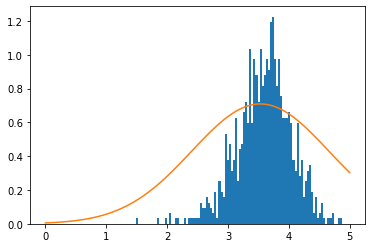

In [107]:
import matplotlib.pyplot as plt 
import scipy.stats as stats

x = plt.hist(stack[:,1], bins=100, density=True)
plt.plot(np.linspace(0,5, num=100),2*stats.norm.pdf(np.linspace(0,5, num=100), mean_rating, std_rating))


In [102]:
 (np.sum(x[0] * np.diff(x[1])) == 1)

True

In [6]:
import pandas as pd 

header='user id | item id | rating | timestamp'.split(' | ')

data = pd.read_csv('ml-100k/u.data', names=header, sep='\t',)

In [11]:
print(data['rating'].mean(),data['rating'].std(),data['rating'].var())

3.52986 1.125673599144129 1.267141051810097


In [20]:
feature = pd.DataFrame(index=range(1,944), columns=range(1, 1683))

In [26]:
for idx, row in data.iterrows():
    id, item, rate, timestamp = row
    feature[item][id] = rate

In [28]:
feature.mean(axis=1)


1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Length: 943, dtype: float64

In [34]:
feature.var(axis=1).sort_values()

849    0.118577
355    0.233846
477    0.255462
469    0.302326
33     0.302536
         ...   
38     2.553719
68     2.574866
531    2.736782
762    2.847619
609    3.062169
Length: 943, dtype: float64

In [38]:
header ='movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Childrens | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'.split(' | ')

movies = pd.read_csv('ml-100k/u.item', names=header, sep='|')

In [43]:
type(movies)

pandas.core.frame.DataFrame